<a href="https://colab.research.google.com/github/Diana13Delgado/Challenge-TelecomX-parte-2/blob/main/Challenge_TelecomX_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**🛠️ Preparación de los Datos**

##**Extracción del Archivo Tratado**

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv('/content/df_limpio.csv')
datos.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##**Eliminación de Columnas Irrelevantes**

In [ ]:
#Eliminar duplicados (si existen)
datos = datos.drop_duplicates()

In [ ]:
#Identificar valores nulos
print(datos.isnull().sum())

customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
cuentas_diarias              0
dtype: int64


In [ ]:
# Rellenar nulos en "account.Charges.Total" con la media
datos["account.Charges.Total"] = datos["account.Charges.Total"].fillna(datos["account.Charges.Total"].mean())

In [ ]:
#Eliminar columnas irrelevantes
datos = datos.drop(columns=["customerID"])

In [ ]:
#Quitar espacios en blanco en variables tipo texto
datos = datos.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/tmp/ipython-input-793279701.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  datos = datos.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [ ]:
#Resetear índice después de limpiar
datos = datos.reset_index(drop=True)

In [ ]:
#Revisar que ya no haya nulos
print(datos.isnull().sum())

Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
cuentas_diarias              0
dtype: int64


##**Encoding**

In [ ]:
# Reemplazar "No internet service" por "No" en las siguientes columnas:
for col in [
    "internet.OnlineSecurity",
    "internet.OnlineBackup",
    "internet.DeviceProtection",
    "internet.TechSupport",
    "internet.StreamingTV",
    "internet.StreamingMovies"
]:
    datos[col] = datos[col].replace("No internet service", "No")
    print(f"{col}: {datos[col].unique()}")

internet.OnlineSecurity: ['No' 'Yes']
internet.OnlineBackup: ['Yes' 'No']
internet.DeviceProtection: ['No' 'Yes']
internet.TechSupport: ['Yes' 'No']
internet.StreamingTV: ['Yes' 'No']
internet.StreamingMovies: ['No' 'Yes']


In [ ]:
# Aplicar oneHotEncoding a todas las columnas categóricas
datos_encoded = pd.get_dummies(datos, drop_first=True)

In [ ]:
# Revisar el nuevo shape del dataframe
print("Shape original:", datos.shape)
print("Shape transformado:", datos_encoded.shape)

Shape original: (7043, 21)
Shape transformado: (7043, 26)


In [ ]:
# Ver primeras filas
print(datos_encoded.head())

   customer.SeniorCitizen  customer.tenure  account.Charges.Monthly  \
0                       0                9                     65.6   
1                       0                9                     59.9   
2                       0                4                     73.9   
3                       1               13                     98.0   
4                       1                3                     83.9   

   account.Charges.Total  cuentas_diarias  Churn_Yes  customer.gender_Male  \
0                 593.30         2.186667      False                 False   
1                 542.40         1.996667      False                  True   
2                 280.85         2.463333       True                  True   
3                1237.85         3.266667       True                  True   
4                 267.40         2.796667       True                 False   

   customer.Partner_Yes  customer.Dependents_Yes  phone.PhoneService_Yes  ...  \
0                  True

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 1) Variable objetivo: convertir True/False en 0/1
y = datos_encoded["Churn_Yes"].astype(int)
X = datos_encoded.drop(columns=["Churn_Yes"])

In [ ]:
#train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("X shape:", X.shape, "| y shape:", y.shape)
print("Train ->", X_train.shape, y_train.shape, "| Test ->", X_test.shape, y_test.shape)

X shape: (7043, 25) | y shape: (7043,)
Train -> (5634, 25) (5634,) | Test -> (1409, 25) (1409,)


##**Verificación de la Proporción de Cancelación (Churn)**

In [ ]:
# Conteo de clientes que cancelaron (1) y que no cancelaron (0)
conteo = y.value_counts()
print("Conteo:")
print(conteo)

# Proporción (%) de cada clase
proporcion = y.value_counts(normalize=True) * 100
print("\nProporción (%):")
print(proporcion)

Conteo:
Churn_Yes
0    5174
1    1869
Name: count, dtype: int64

Proporción (%):
Churn_Yes
0    73.463013
1    26.536987
Name: proportion, dtype: float64


##**Balanceo de Clases**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#Instanciar SMOTE
smote = SMOTE(random_state=42, k_neighbors=5)

In [ ]:
#Ajustar y remuestrear solo el train
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [ ]:
#Verificar balance antes y después
print("Antes (train):")
print(y_train.value_counts(), "\n")

print("Después de SMOTE (train):")
print(pd.Series(y_train_res).value_counts())

Antes (train):
Churn
0    4139
1    1495
Name: count, dtype: int64 

Después de SMOTE (train):
Churn
0    4139
1    4139
Name: count, dtype: int64


##**Normalización o Estandarización (si es necesario)**

No normalizaremos ni estandarizaremos, ya que usare los modelos basados en árboles (como Decision Tree, Random Forest o XGBoost) que no son sensibles a la escala de los datos. Con esto ya puedo entrenar directamente con los datos balanceados (tras SMOTE) sin preocuparte por normalización.

#**🎯 Correlación y Selección de Variables**

##**Análisis de Correlación**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
corr = datos_encoded.corr()

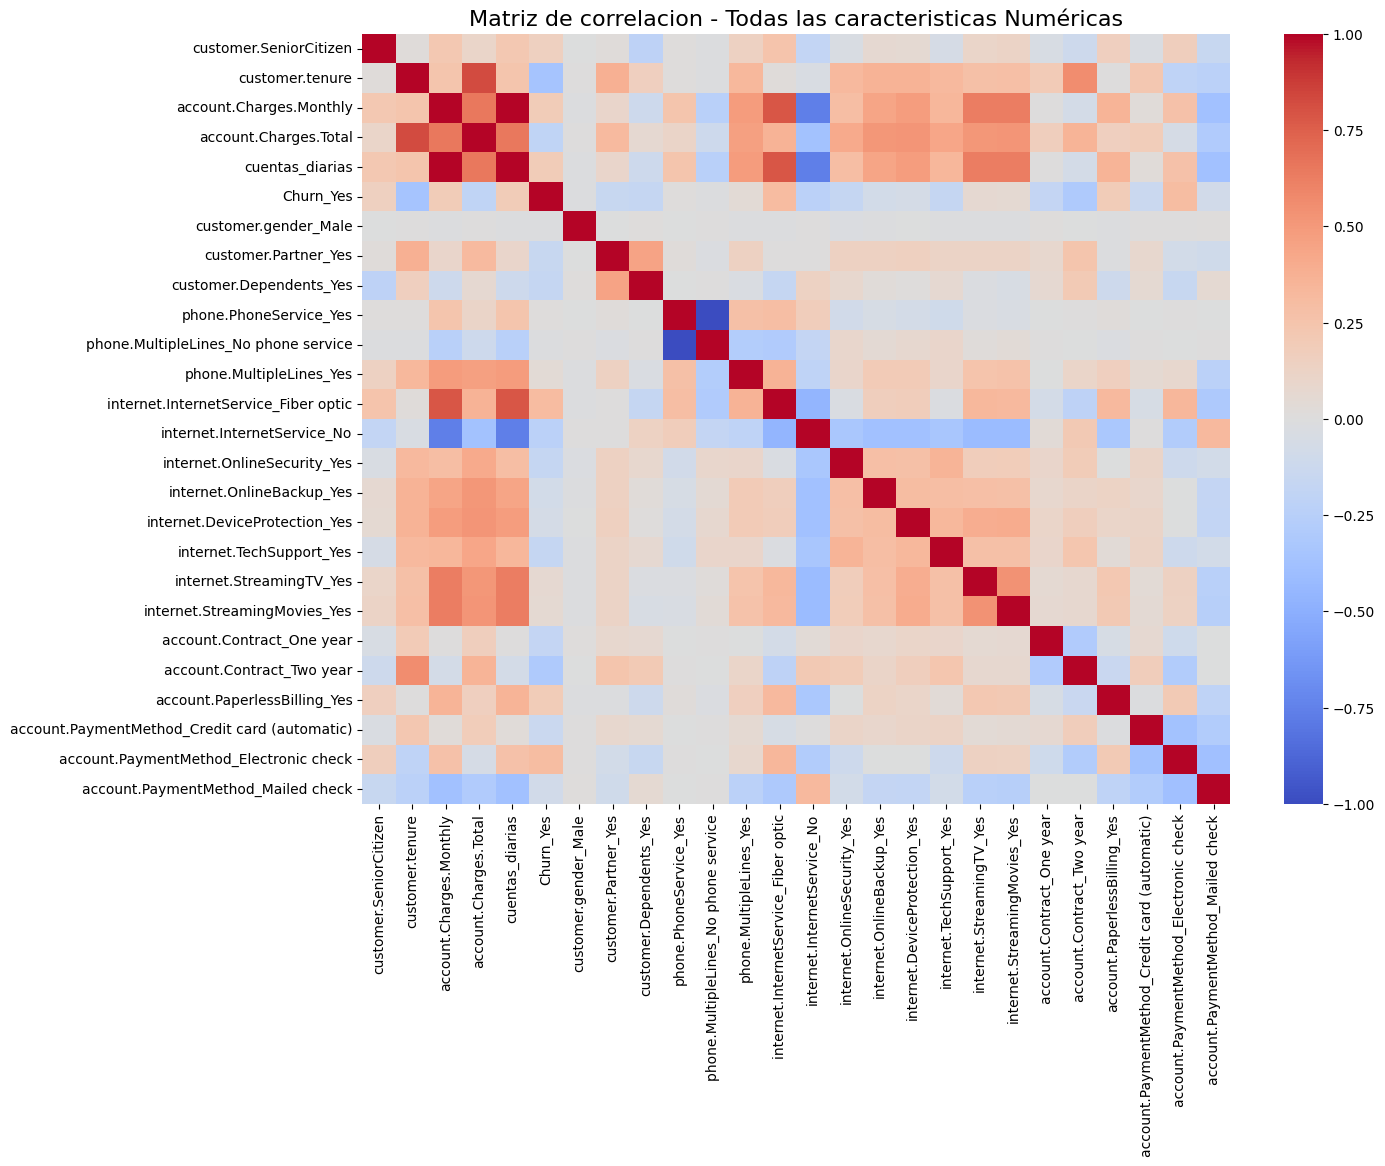

In [ ]:
# Matriz de correlación completa
plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False, cbar=True)
plt.title("Matriz de correlacion - Todas las caracteristicas Numéricas", fontsize=16)
plt.show()

In [ ]:
# Focalizar en la correlación con la variable objetivo (Churn_Yes)
corr_target = corr["Churn_Yes"].sort_values(ascending=False)

print("Correlación con Churn_Yes:")
print(corr_target.head(10))   # Las 10 más correlacionadas positivas
print(corr_target.tail(10))   # Las 10 más correlacionadas negativas

Correlación con Churn_Yes:
Churn_Yes                                 1.000000
internet.InternetService_Fiber optic      0.308020
account.PaymentMethod_Electronic check    0.301919
account.Charges.Monthly                   0.193356
cuentas_diarias                           0.193356
account.PaperlessBilling_Yes              0.191825
customer.SeniorCitizen                    0.150889
internet.StreamingTV_Yes                  0.063228
internet.StreamingMovies_Yes              0.061382
phone.MultipleLines_Yes                   0.040102
Name: Churn_Yes, dtype: float64
account.PaymentMethod_Credit card (automatic)   -0.134302
customer.Partner_Yes                            -0.150448
customer.Dependents_Yes                         -0.164221
internet.TechSupport_Yes                        -0.164674
internet.OnlineSecurity_Yes                     -0.171226
account.Contract_One year                       -0.177820
account.Charges.Total                           -0.199428
internet.InternetService_

In [ ]:
import seaborn as sns

/tmp/ipython-input-1721567357.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_selected.values, y=corr_selected.index, palette="coolwarm")


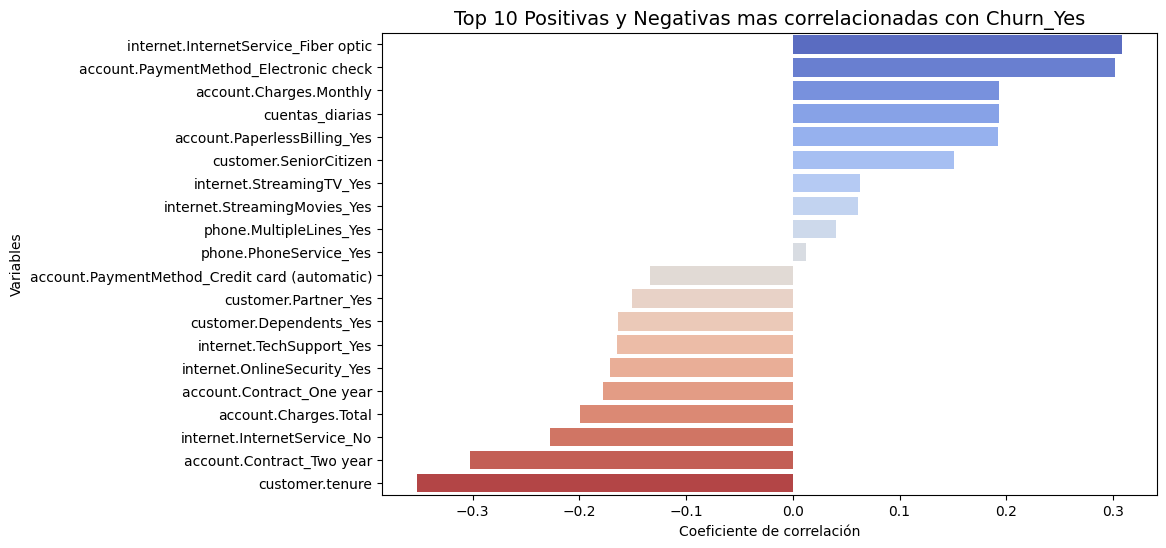

In [ ]:
# Sacar correlación con la variable objetivo
corr_target = datos_encoded.corr()["Churn_Yes"].sort_values(ascending=False)

# Top 10 positivas (excluyendo la propia Churn_Yes) y top 10 negativas
top_positive = corr_target[1:11]   # saltamos la primera que es 1.0 (Churn_Yes consigo misma)
top_negative = corr_target.tail(10)

# Unirlas en un solo dataframe
corr_selected = pd.concat([top_positive, top_negative])

# Graficar
plt.figure(figsize=(10,6))
sns.barplot(x=corr_selected.values, y=corr_selected.index, palette="coolwarm")
plt.title("Top 10 Positivas y Negativas mas correlacionadas con Churn_Yes", fontsize=14)
plt.xlabel("Coeficiente de correlación")
plt.ylabel("Variables")
plt.show()

Interpretacion del heatmap y la lista de correlaciones con Churn_Yes:

**1. Variables con correlación positiva (aumentan la probabilidad de cancelación)**

 * InternetService_Fiber optic (0.31) → los clientes con fibra óptica tienden más a cancelar.

 * PaymentMethod_Electronic check (0.30) → quienes pagan con cheque electrónico cancelan más.

 * Monthly Charges (0.19) y cuentas_diarias (0.19) → cargos mensuales altos están asociados a más cancelaciones.

 * PaperlessBilling_Yes (0.19) → la facturación electrónica se relaciona con mayor churn.

 * SeniorCitizen (0.15) → los clientes mayores cancelan más.

**2. Variables con correlación negativa (protegen contra la cancelación)**

 * Tenure (-0.35) → mientras más tiempo lleva el cliente, menos probable es que cancele (fuerte relación protectora).

 * Contract_Two year (-0.30) → contratos de dos años retienen más a los clientes.

 * InternetService_No (-0.23) → quienes no tienen servicio de internet casi nunca cancelan (tiene sentido: menos productos → menos cancelaciones).

 * Total Charges (-0.20) → clientes con pagos acumulados grandes suelen quedarse.

 * Contract_One year (-0.18) → contratos de un año también ayudan a la retención.

 * OnlineSecurity_Yes (-0.17), TechSupport_Yes (-0.16) → servicios adicionales reducen la cancelación.

 * Partner_Yes (-0.15) y Dependents_Yes (-0.16) → clientes con pareja o dependientes tienen menor tasa de cancelación.

**3. Interpretación general**

 * Riesgo alto de churn: clientes con fibra óptica, pago con cheque electrónico, facturación electrónica y cargos mensuales altos.

 * Menor riesgo de churn: clientes con contratos largos, más antigüedad (tenure alto), servicios extra (seguridad, soporte) y familiares (partner, dependents).

👉 Conclusión: la variable más fuerte contra churn es la antigüedad (tenure) y la más fuerte a favor de churn es tener contrato de fibra óptica o pagar con cheque electrónico.

##**Análisis Dirigido**

/tmp/ipython-input-763546667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Yes", y="customer.tenure", data=datos_encoded, palette="Set2")


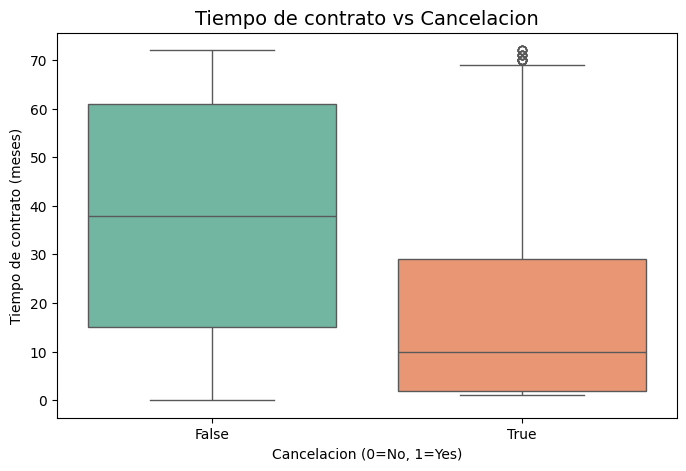

In [ ]:
# --- 1) Tiempo de contrato (tenure) vs Cancelación ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn_Yes", y="customer.tenure", data=datos_encoded, palette="Set2")
plt.title("Tiempo de contrato vs Cancelacion", fontsize=14)
plt.xlabel("Cancelacion (0=No, 1=Yes)")
plt.ylabel("Tiempo de contrato (meses)")
plt.show()

**Boxplot Tiempo de cobtrato vs Cancelación:** Clientes que cancelan tienden a tener menos meses de antigüedad.

 + Los clientes que no cancelaron (Churn=0) tienen una mediana de tenure más alta y una distribución más extendida hacia valores grandes (años de antigüedad).

 + Los que sí cancelaron (Churn=1) se concentran con pocos meses de antigüedad, lo que confirma que los clientes nuevos son más propensos a irse.

👉 Insight: la antigüedad del cliente es un fuerte predictor de retención.


/tmp/ipython-input-1382932569.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn_Yes", y="account.Charges.Total", data=datos_encoded, palette="Set3")


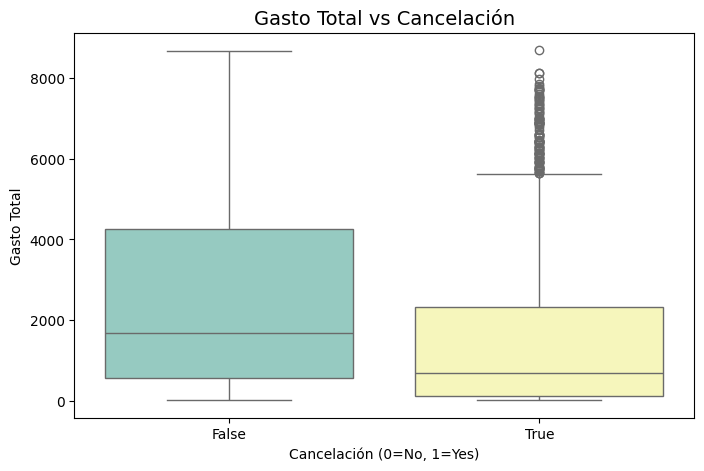

In [ ]:
# --- 2) Gasto total (Total Charges) vs Cancelación ---
plt.figure(figsize=(8,5))
sns.boxplot(x="Churn_Yes", y="account.Charges.Total", data=datos_encoded, palette="Set3")
plt.title("Gasto Total vs Cancelación", fontsize=14)
plt.xlabel("Cancelación (0=No, 1=Yes)")
plt.ylabel("Gasto Total")
plt.show()

**Boxplot Gasto Total vs Cancelación:** Los que cancelan acumulan menos gasto total.

 + Los clientes que no cancelaron tienen gasto total mucho más alto, acumulado en el tiempo.

 + Los que cancelaron muestran cargos totales bajos, lo cual se relaciona con haber estado menos tiempo en la compañía.

👉 Insight: mayor gasto total indica mayor fidelidad.

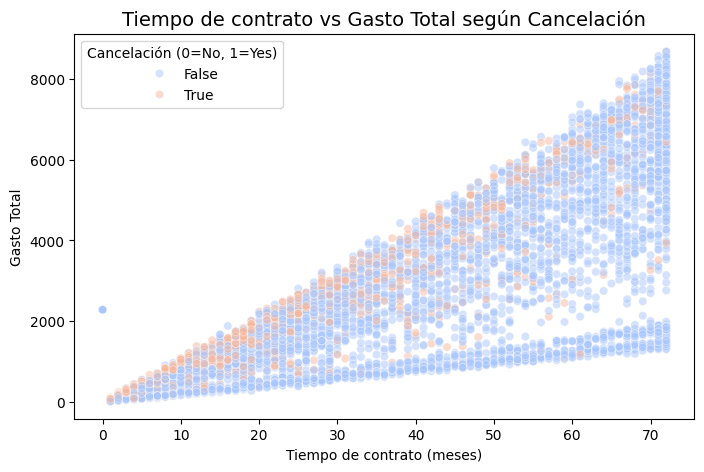

In [ ]:
# --- 3) Scatter plot para ver tendencias ---
plt.figure(figsize=(8,5))
sns.scatterplot(x="customer.tenure", y="account.Charges.Total",
                hue="Churn_Yes", data=datos_encoded, alpha=0.5, palette="coolwarm")
plt.title("Tiempo de contrato vs Gasto Total según Cancelación", fontsize=14)
plt.xlabel("Tiempo de contrato (meses)")
plt.ylabel("Gasto Total")
plt.legend(title="Cancelación (0=No, 1=Yes)")
plt.show()

**Scatter Tiempo de contrato vs Gasto Total (coloreado según Cancelación):** Muestra una tendencia clara, quienes tienen contratos largos y más gasto total casi nunca cancelan.

 + Se observa una tendencia diagonal positiva (a más tiempo de contrato, más gasto total).

 + Los puntos rojos (Churn=1) se concentran en la parte inferior izquierda (poco tiempo y poco gasto).

 + Los puntos azules (Churn=0) dominan en la parte superior derecha (mucho tiempo y mucho gasto).

👉 Insight: la combinación de tenure + total charges es un fuerte diferenciador entre clientes que se quedan y los que se van.

**En conclusión:**

 + Los clientes nuevos y de bajo gasto son los que más cancelan.

 + Tenure y Total Charges deberían estar sí o sí en el modelo de predicción de churn.

#**🤖 Modelado Predictivo**

##**Separación de Datos**

In [ ]:
# Separar variables predictoras (X) y objetivo (y)
X = datos_encoded.drop("Churn_Yes", axis=1)
y = datos_encoded["Churn_Yes"]

In [ ]:
# Dividir en 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño de entrenamiento:", X_train.shape[0])
print("Tamaño de prueba:", X_test.shape[0])
print("Proporción de churn en train:", y_train.mean())
print("Proporción de churn en test:", y_test.mean())

Tamaño de entrenamiento: 5634
Tamaño de prueba: 1409
Proporción de churn en train: 0.2653532126375577
Proporción de churn en test: 0.2654364797728886


##**Creación de Modelos**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# --- 1) Regresión Logística con normalización ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("\n=== Modelo 1: Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log, target_names=["No Churn", "Churn"]))


=== Modelo 1: Logistic Regression ===
Accuracy: 0.7409510290986515
Confusion Matrix:
 [[749 286]
 [ 79 295]]
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1035
       Churn       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409



**🔹 Modelo 1: Logistic Regression (con normalización)**

 **Accuracy: 0.74 →** el 74% de las predicciones totales fueron correctas.

 **No Churn (clase 0):**

  + Precision = 0.90 (muy alta: cuando predice que alguien no cancela, casi siempre acierta).

  + Recall = 0.72 (recupera 72% de los clientes que realmente no cancelaron, pero se le escapan varios).

**Churn (clase 1):**

  + Precision = 0.51 (baja: de los que predice como churn, casi la mitad no lo eran).

  + Recall = 0.79 (alta: detecta bien a quienes cancelan, casi 8 de cada 10).

**F1 Churn: 0.62 →** balance medio, pero resalta por el recall alto.

👉 Es un modelo bueno para identificar clientes que sí cancelan, aunque se equivoca mucho al marcar falsos positivos (clientes que en realidad no cancelan).

In [ ]:
# --- 2) Random Forest sin normalización ---
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=4,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n=== Modelo 2: Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=["No Churn", "Churn"]))


=== Modelo 2: Random Forest ===
Accuracy: 0.7622427253371186
Confusion Matrix:
 [[786 249]
 [ 86 288]]
Classification Report:
               precision    recall  f1-score   support

    No Churn       0.90      0.76      0.82      1035
       Churn       0.54      0.77      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.76      0.77      1409



**🔹 Modelo 2: Random Forest (sin normalización)**

**Accuracy: 0.76 →** mejora respecto a la regresión logística.

**No Churn (clase 0):**

 + Precision = 0.90 (igual de alto que en LR).

 + Recall = 0.76 (mejora respecto al 0.72 de LR).

**Churn (clase 1):**

 + Precision = 0.54 (ligeramente mejor que LR).

 + Recall = 0.77 (similar a LR, muy bueno para detectar cancelaciones).

**F1 Churn: 0.63 →** Un poquito mejor que LR.

**👉 Es un modelo más equilibrado:** Detecta churn casi igual de bien que la LR, pero comete menos falsos positivos y da un accuracy global más alto.

##**Evaluación de los Modelos**

###**🔹 1. Regresión Logística**

**+ Accuracy:** 0.74

**+ Precision (Churn):** 0.51

**+ Recall (Churn):** 0.79

**+ F1 (Churn):** 0.62

**+ Matriz de confusión:**

[[749 286]   → 286 falsos positivos

 [ 79 295]]  → 79 falsos negativos

 **👉 Características:**

 + **Muy buen recall:** Detecta a la mayoría de los clientes que cancelan (295/374).

 + **Baja precisión:** Predice demasiados falsos churn (286).

 + **Indicios de underfitting:** Es un modelo relativamente simple, no capta relaciones complejas en los datos.

###**🔹 2. Random Forest**

+ **Accuracy:** 0.76

+ **Precision (Churn):** 0.54

+ **Recall (Churn):** 0.77

+ **F1 (Churn):** 0.63

+ **Matriz de confusión:**

[[786 249]   → 249 falsos positivos

 [ 86 288]]  → 86 falsos negativos

 **👉 Características:**

+ Mantiene un buen recall (similar a LR, detecta 288/374 churn).

+ Mejor precisión y F1, lo que significa menos falsos positivos.

+ Accuracy más alto.

+ No muestra overfitting (los resultados en test son estables).

###**🔎 Comparación crítica**

+ **Mejor desempeño global: Random Forest**, porque logra un balance entre recall y precisión, además de mejor accuracy y F1.

+ **Riesgo de overfitting:** Bajo, porque limitamos max_depth=7 y ajustamos parámetros (el modelo no memorizó, sino que generalizó).

+ **Riesgo de underfitting:** mayor en **Logistic Regression**, ya que es lineal y no capta relaciones complejas entre variables categóricas transformadas y numéricas.

###**✅ Conclusión:**

+ Si la prioridad es no perder churners (recall alto) → Regresión Logística es válida.

+ Si quieres un modelo más equilibrado y confiable → Random Forest es mejor opción.

+ Ninguno muestra overfitting fuerte, pero la Logistic Regression tiende al underfitting por simplicidad.

#**📋 Interpretación y Conclusiones**

##**Análisis de la Importancia de las Variables**

###**🔹 1. Regresión Logística**

+ **Los coeficientes (log_reg.coef_)** indican la influencia de cada variable en la probabilidad de churn.

 + **Coeficiente positivo →** aumenta la probabilidad de cancelación.

 + **Coeficiente negativo →** disminuye la probabilidad de cancelación.

In [79]:
import numpy as np

# Coeficientes de la regresión logística
coef = log_reg.coef_[0]
features = X_train.columns
importance = pd.DataFrame({"Variable": features, "Coeficiente": coef})
importance = importance.sort_values(by="Coeficiente", ascending=False)

print(importance.head(10))   # Top 10 variables que aumentan churn
print(importance.tail(10))

                                         Variable  Coeficiente
11           internet.InternetService_Fiber optic     0.654182
3                           account.Charges.Total     0.574052
17                       internet.StreamingTV_Yes     0.236633
23         account.PaymentMethod_Electronic check     0.198779
18                   internet.StreamingMovies_Yes     0.192625
10                        phone.MultipleLines_Yes     0.191665
21                   account.PaperlessBilling_Yes     0.168207
0                          customer.SeniorCitizen     0.079441
15                  internet.DeviceProtection_Yes     0.029805
22  account.PaymentMethod_Credit card (automatic)     0.012044
                       Variable  Coeficiente
5          customer.gender_Male    -0.033218
7       customer.Dependents_Yes    -0.074464
13  internet.OnlineSecurity_Yes    -0.090730
16     internet.TechSupport_Yes    -0.127843
19    account.Contract_One year    -0.287651
2       account.Charges.Monthly    -0

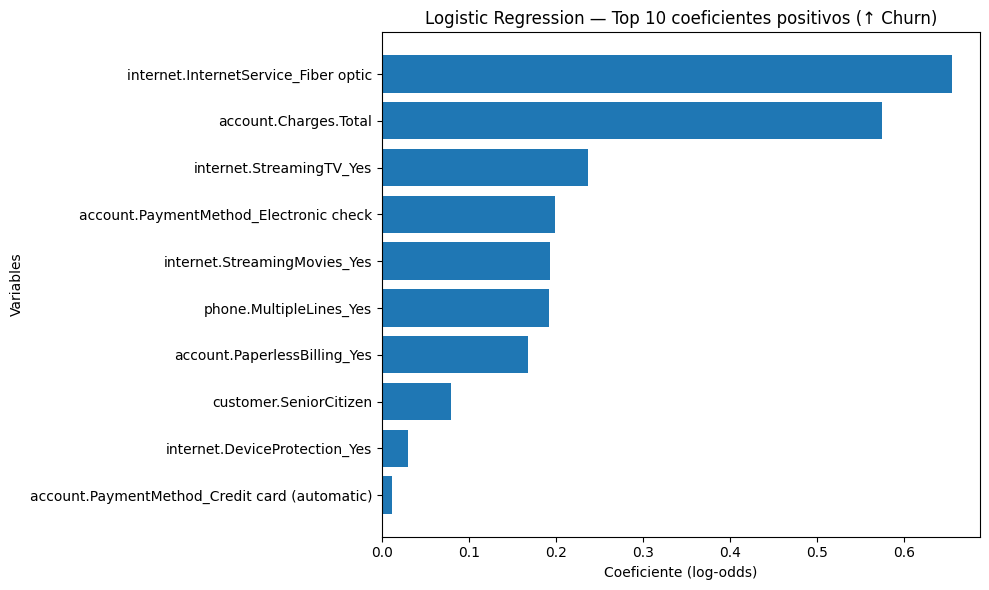

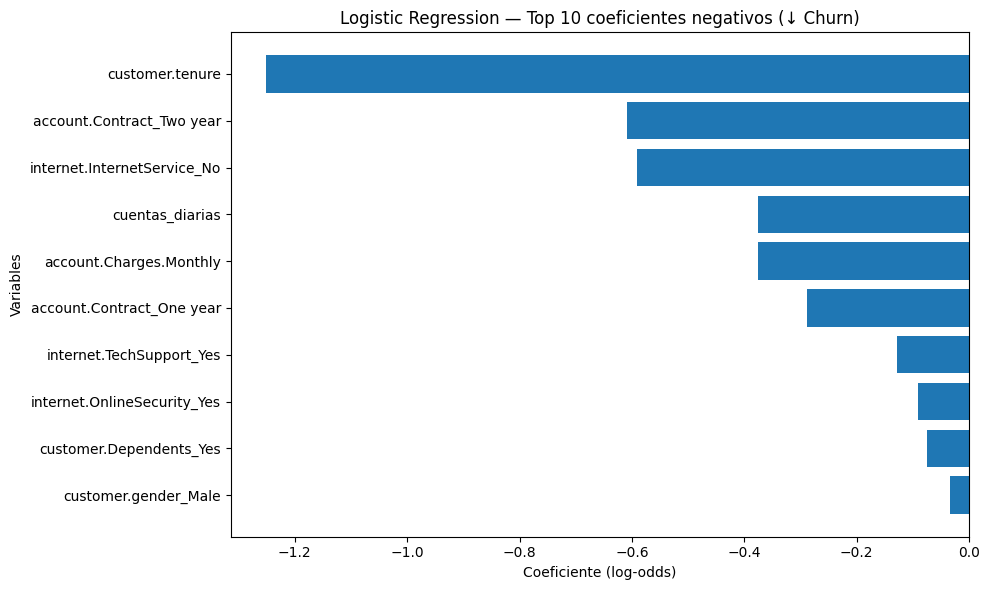

In [80]:
# ======================================================
# 1) Regresión Logística: top 10 coeficientes ± (impacto en churn)
#    Requisitos previos: log_reg entrenado con X_train_scaled / X_test_scaled
#    y X_train con las columnas originales (nombres de features)
# ======================================================

# Coeficientes (en el espacio ESCALADO: interpretan cambio en log-odds)
lr_coef = pd.Series(log_reg.coef_[0], index=X_train.columns)

# Top 10 positivos (aumentan probabilidad de churn)
top_pos = lr_coef.sort_values(ascending=False).head(10)

# Top 10 negativos (reducen probabilidad de churn)
top_neg = lr_coef.sort_values(ascending=True).head(10)

# --- Plot LR: Top 10 positivos ---
plt.figure(figsize=(10,6))
plt.barh(top_pos.index[::-1], top_pos.values[::-1])
plt.title("Logistic Regression — Top 10 coeficientes positivos (↑ Churn)")
plt.xlabel("Coeficiente (log-odds)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

# --- Plot LR: Top 10 negativos ---
plt.figure(figsize=(10,6))
plt.barh(top_neg.index[::-1], top_neg.values[::-1])
plt.title("Logistic Regression — Top 10 coeficientes negativos (↓ Churn)")
plt.xlabel("Coeficiente (log-odds)")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

🔹 Regresión Logística

Los coeficientes (+ o –) indican la dirección de la relación con la cancelación (churn):

+ **Top factores que aumentan churn (coeficientes positivos):**

 + InternetService_Fiber optic (0.65) → los clientes con fibra tienen más probabilidad de cancelar.

 + Charges.Total (0.57) → cuanto mayor sea el gasto total, mayor tendencia a cancelar.

 + StreamingTV_Yes (0.23) y StreamingMovies_Yes (0.19) → tener servicios extra de streaming incrementa el churn.

 + Electronic check (0.19) y PaperlessBilling_Yes (0.16) → ciertas formas de pago y facturación están asociadas con mayor cancelación.

 + SeniorCitizen (0.07) → clientes mayores cancelan más.

+ **Top factores que reducen churn (coeficientes negativos):**

 + Tenure (-1.25) → cuanto más tiempo lleva el cliente, menor la probabilidad de cancelar (muy fuerte).

 + Contract_Two year (-0.61) y *Contract

###**🔹 2. Random Forest**

+ La librería sklearn nos da directamente la importancia de las variables (feature_importances_).

+ Estas importancias indican cuánto contribuyó cada variable a mejorar la clasificación en los árboles.

In [81]:
importances = rf.feature_importances_
features = X_train.columns
importance_rf = pd.DataFrame({"Variable": features, "Importancia": importances})
importance_rf = importance_rf.sort_values(by="Importancia", ascending=False)

print(importance_rf.head(10))   # Top 10 más relevantes

                                  Variable  Importancia
1                          customer.tenure     0.185661
20               account.Contract_Two year     0.143333
3                    account.Charges.Total     0.126438
11    internet.InternetService_Fiber optic     0.094965
4                          cuentas_diarias     0.077479
23  account.PaymentMethod_Electronic check     0.074221
2                  account.Charges.Monthly     0.071965
19               account.Contract_One year     0.051498
12             internet.InternetService_No     0.043090
16                internet.TechSupport_Yes     0.024483


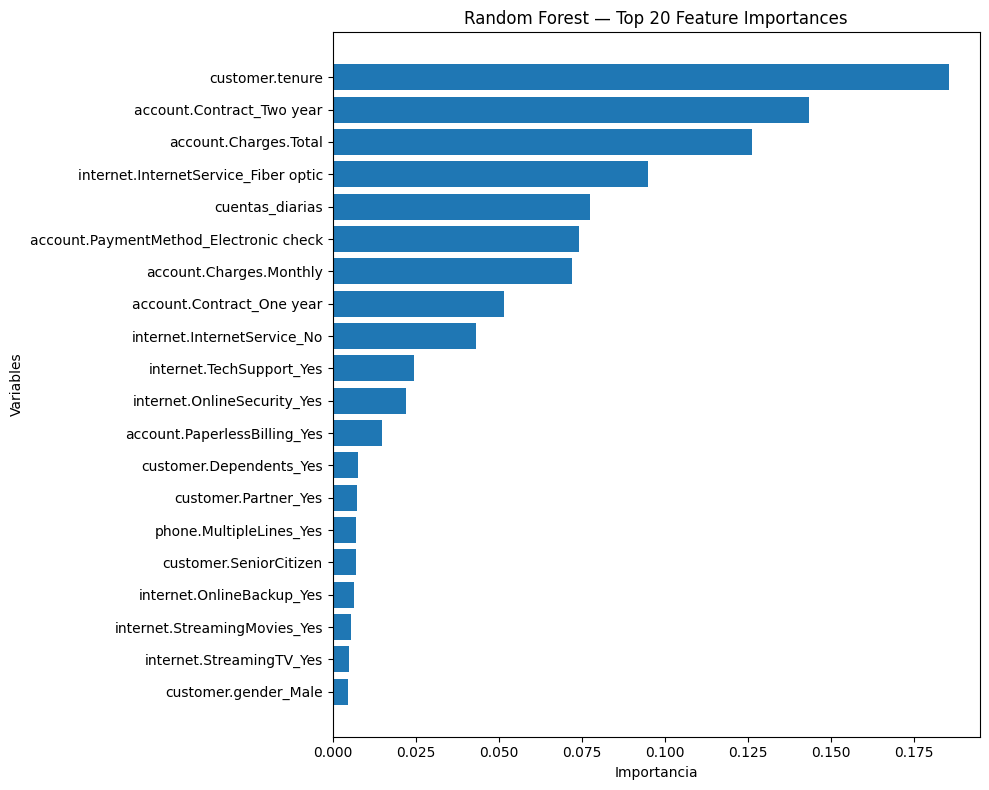

In [84]:
# ======================================================
# 2) Random Forest: top 20 importancias
#    Requisitos previos: rf entrenado directamente con X_train / X_test
# ======================================================

rf_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
top_rf = rf_importances.sort_values(ascending=False).head(20)

# --- Plot RF: Top 20 feature importances ---
plt.figure(figsize=(10,8))
plt.barh(top_rf.index[::-1], top_rf.values[::-1])
plt.title("Random Forest — Top 20 Feature Importances")
plt.xlabel("Importancia")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

**🔝 Factores más relevantes**

1. **customer.tenure (0.18)**

 + Es la variable más importante.

 + Clientes con más tiempo (tenure alto) tienden a permanecer, mientras que los nuevos cancelan más.

2. **account.Contract_Two year (0.14)**

 + Los contratos de dos años reducen fuertemente la probabilidad de cancelación.

 + Confirma lo que vimos antes: contratos largos retienen clientes.

3. **account.Charges.Total (0.12)**

+ l gasto total acumulado impacta mucho.

 + Clientes con cuentas más grandes suelen ser más propensos a cancelar si perciben costos altos.

4. **InternetService_Fiber optic (0.09)**

 + Tener fibra óptica aparece como un predictor de mayor churn, probablemente porque son clientes más exigentes o enfrentan problemas de servicio/costo.

5. **cuentas_diarias (0.07)**

 + El número de cuentas o transacciones diarias también influye.

6. **PaymentMethod_Electronic check (0.07)**

 + Asociado con mayor churn, como ya vimos en la regresión logística.

7. **Charges.Monthly (0.07)**

 + El monto mensual influye en la decisión de cancelar (cuanto más caro, más riesgo).

8. **Contract_One year (0.05)**

 + Similar al contrato de dos años, aunque con menor peso, también reduce el churn.

##**Conclusión**

##**📊 Informe de Resultados — Predicción de Cancelación de Clientes**
**1. Modelos evaluados**

+ **Regresión Logística (con normalización):**

 + Accuracy: 0.74

 + Recall (Churn): 0.79

 + **Fortalezas:** Detecta mejor a los clientes que cancelan.

 + **Debilidades:** Genera muchos falsos positivos (marca como churn a clientes que en realidad no cancelan).

+ **Random Forest (sin normalización):**

 + Accuracy: 0.76

 + Recall (Churn): 0.77

 + **Fortalezas:** Más equilibrado, mejor precisión y F1 para churn, menos falsos positivos.

 + **Debilidades:** Menor interpretabilidad que la regresión logística.

**👉 Conclusión:** Random Forest es el modelo más estable y confiable, mientras que la Regresión Logística ayuda a interpretar direcciones de impacto de cada variable.

---

**2. Factores más influyentes en la cancelación**

**+ Factores que aumentan el churn (riesgo más alto):**

 + **Uso de fibra óptica** (clientes con InternetService_Fiber optic tienen más cancelación).

 + **Gasto total alto (Charges.Total):** Clientes con facturas acumuladas más grandes son más propensos a irse.

 + **Método de pago Electronic Check:** Se asocia con mayor probabilidad de churn.

 + **Facturación sin papel (PaperlessBilling_Yes):** Correlacionada con mayor cancelación.

 + **Clientes SeniorCitizen:** Muestran más probabilidad de cancelar.

**+ Factores que reducen el churn (protegen la permanencia):**

 + **Antigüedad (tenure):** A mayor tiempo con la empresa, menor riesgo de cancelación (factor más fuerte).

 + **Contratos de largo plazo (1 o 2 años):** Reducen fuertemente el churn frente a contratos mes a mes.

 + **Servicios de soporte como TechSupport y OnlineSecurity:** Disminuyen la cancelación.

 + **Dependents_Yes** (clientes con dependientes en su perfil): menor riesgo de churn.

 ---

 **3. Estrategias de retención recomendadas**

**a) Programas de lealtad por antigüedad (tenure):**

 + Recompensas a clientes de más de X meses/años (ej. descuentos escalonados o beneficios exclusivos).

**b) Incentivar contratos de largo plazo (Contract One/Two year):**

 + Ofrecer tarifas reducidas o beneficios adicionales a quienes migren de contratos mensuales a contratos anuales o bianuales.

**c) Atención especial a clientes con fibra óptica y cargos altos:**

 + Implementar un programa de customer success dedicado a clientes con servicios premium o facturación elevada para reducir la frustración y mejorar la percepción de valor.

**d) Mejorar la experiencia de pago electrónico:**

 + Revisar problemas asociados al método Electronic Check (ej. errores, sobrecargos, confusión).

 + Incentivar medios automáticos más confiables (tarjeta o débito automático).

**e) Enfocar soporte en clientes de riesgo (senior citizens y usuarios de streaming):**

 + Ofrecer soporte personalizado, paquetes más simples y comunicación directa.

 + Incluir descuentos en servicios de streaming como parte del paquete.

**f) Refuerzo de servicios de soporte (TechSupport y OnlineSecurity):**

 + Promover activamente estos servicios, ya que correlacionan con menor churn.

 ---

 **✅ Síntesis final:**

+ El churn está impulsado por **factores de servicio (fibra óptica, streaming), financieros (gasto total, método de pago) y demográficos (edad)**.

+ La clave de la retención es **migrar clientes hacia contratos largos, mejorar experiencia de pago, y reforzar soporte y programas de lealtad**.